# Removing Rows and Columns

In [1]:
import missingno as msno
import pandas as pd

In [3]:
df = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv") # IMPORTANT: csv file is compressed, please unzip that!, #data src: https://www.kaggle.com/code/rtatman/data-cleaning-challenge-handling-missing-values/input?select=NFL+Play+by+Play+2009-2016+%28v3%29.csvdf
df

C:\Users\Meet Patel\AppData\Local\Temp\ipykernel_18904\638540561.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv") # IMPORTANT: csv file is compressed, please unzip that!, #data src: https://www.kaggle.com/code/rtatman/data-cleaning-challenge-handling-missing-values/input?select=NFL+Play+by+Play+2009-2016+%28v3%29.csvdf


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,2017-01-01,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB,...,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,2017-01-01,2017010102,20,4,NaN,00:13,1,13.0,9.0,GB,...,NaN,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,NaN,NaN,2016
362444,2017-01-01,2017010102,21,4,NaN,00:13,1,13.0,0.0,DET,...,NaN,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,NaN,NaN,2016
362445,2017-01-01,2017010102,21,4,1.0,00:12,1,12.0,1.0,DET,...,NaN,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,NaN,NaN,2016


<Axes: >

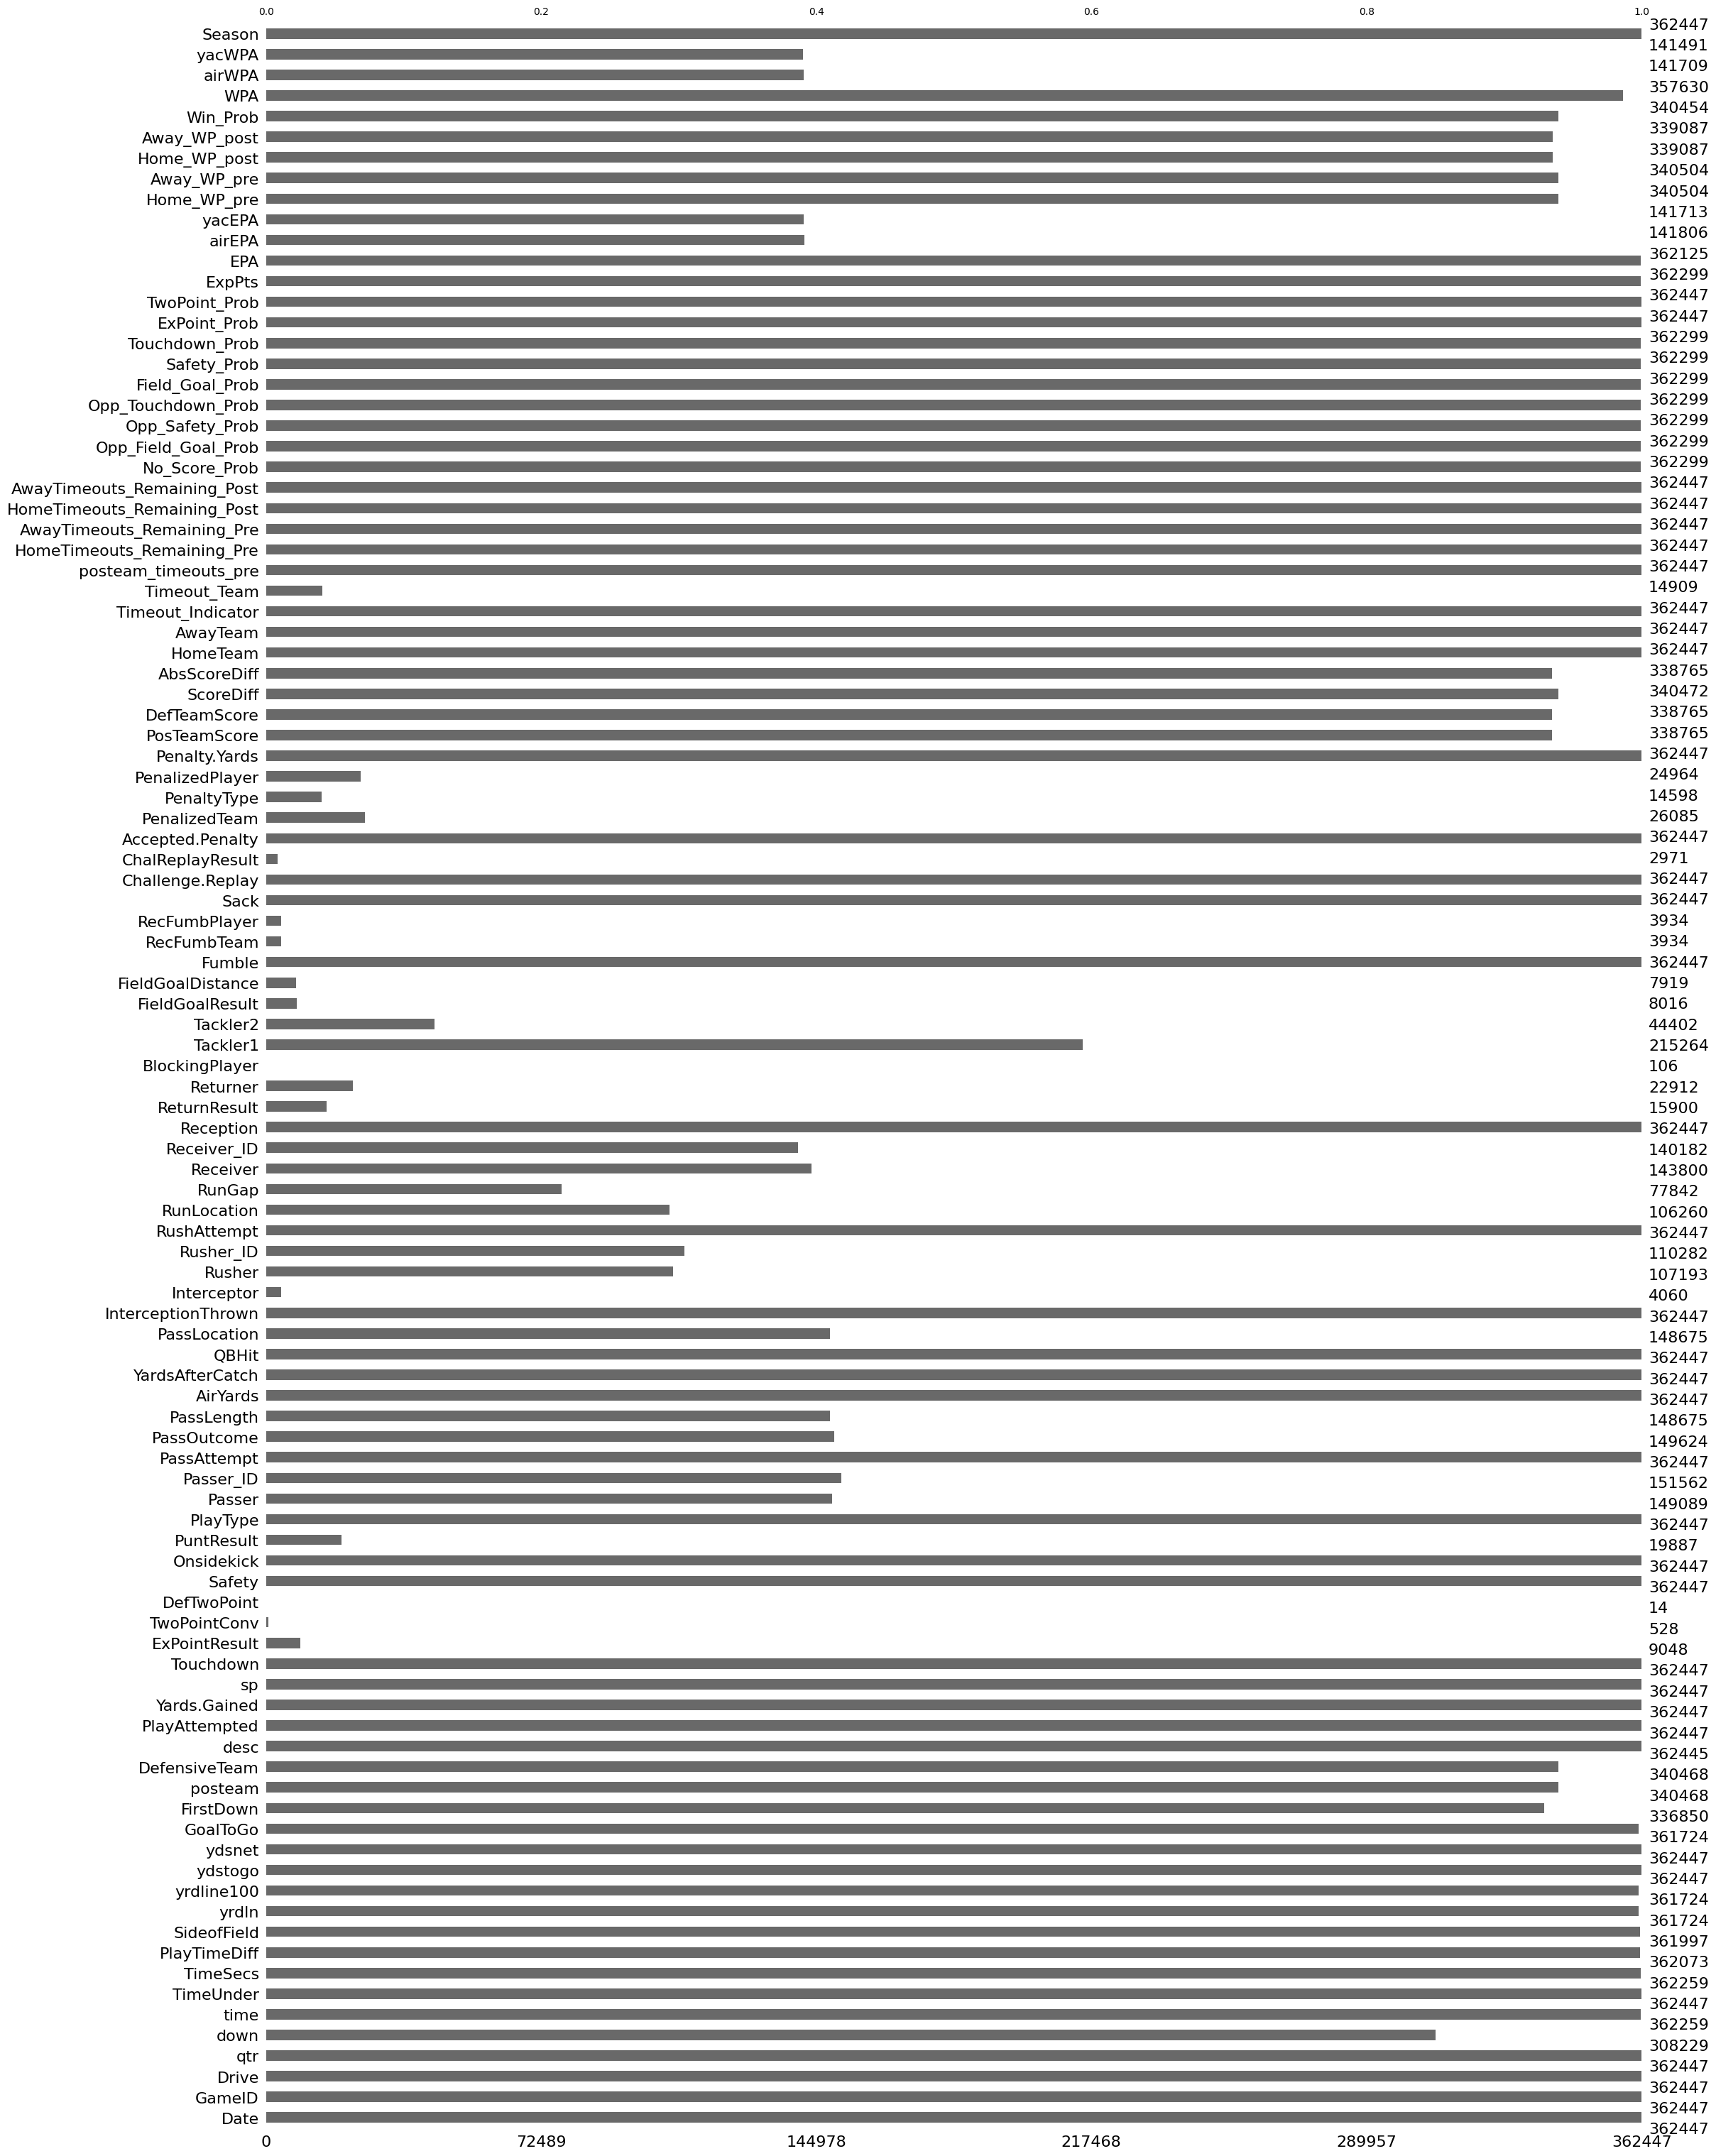

In [4]:
#Method - 1 - To analysis missing data

msno.bar(df) #The length of the bar indicates how complete columns is.(fully completed = no missing values) and  the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness.

<Axes: >

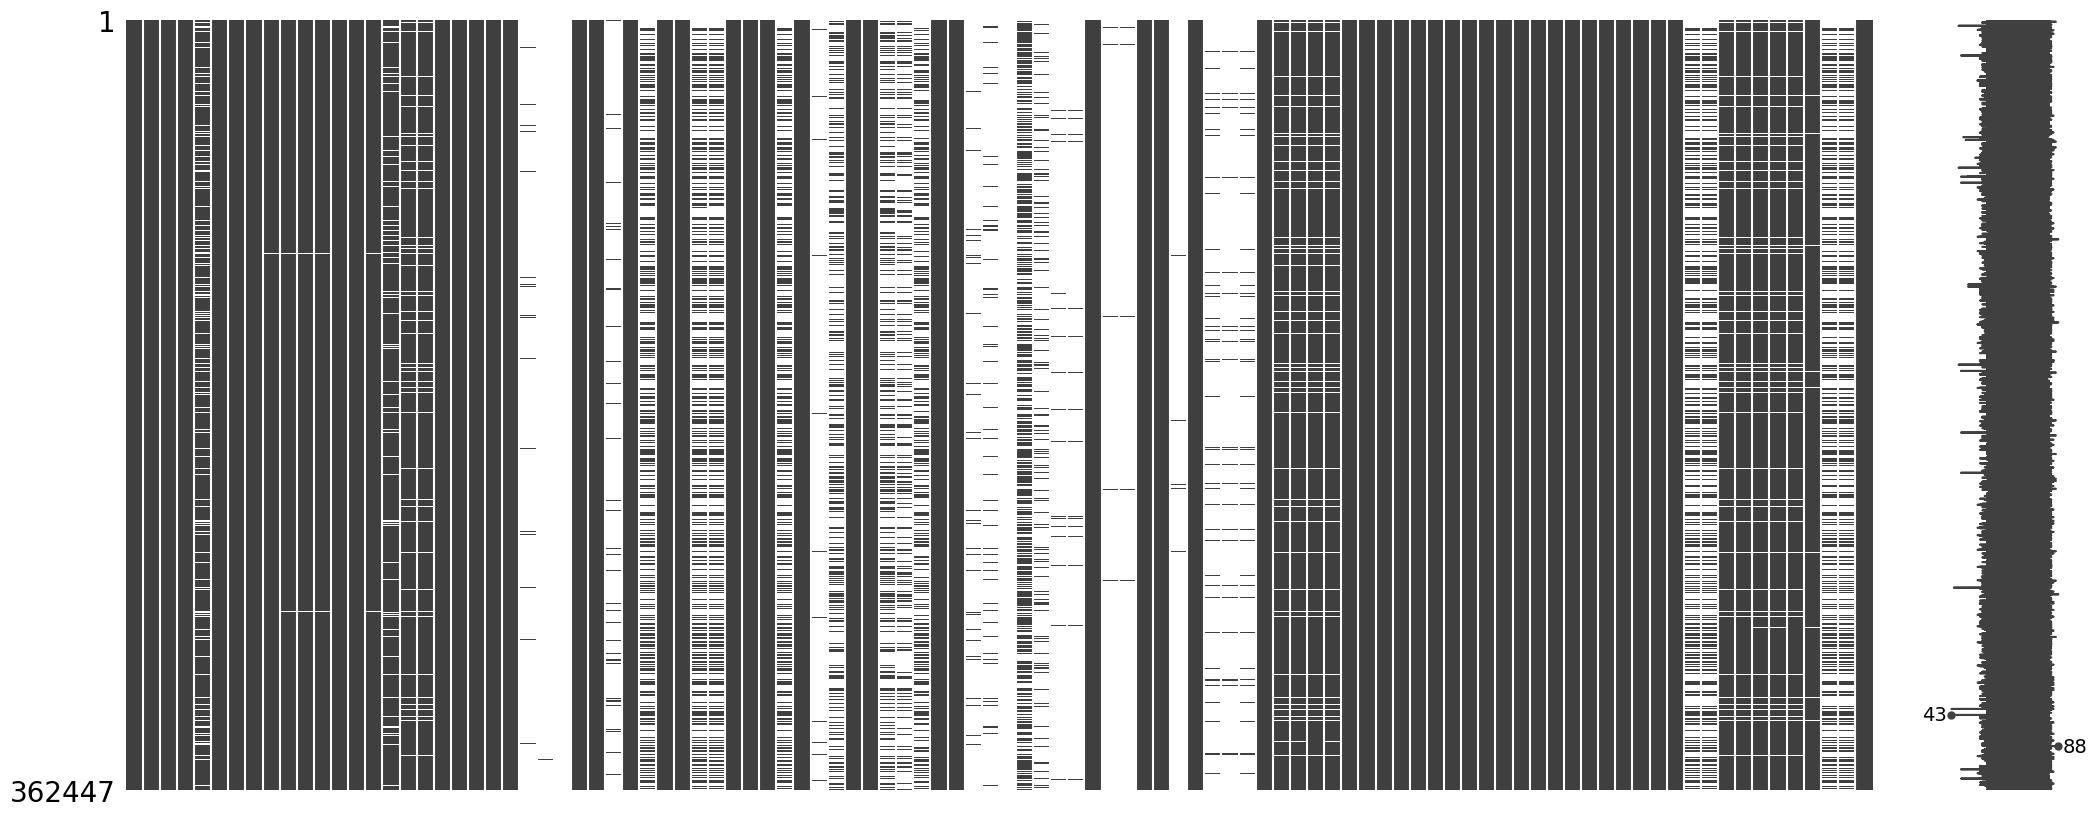

In [3]:
#Method - 2 - To analysis missing data

msno.matrix(df) #difference between above bar graph and this matrix plot is, Matrix Plot has benefit that you can view how that missing data is distributed in the dataframe.
#each and every line represent a column, grey part represent as data and white part represent as missing data 
#we can see that some columns have just few data and some have not that much too. (we will definitely remove that all columns.)
#we can't see column name at their represented line in below graph, Coz if dataset have 50 columns than only msno matrix can show column names.(here 120 column, so we will divide dataset with respect to 'columns')


#-----IMPORTANT-----
# On the right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right.
# When a row has a value in each column, the line will be at the maximum right position. As missing values start to increase within that row the line will move towards the left.
# Look at here, 88 means, a row contains 88 values which is highest among all rows and a row is here which have 43 values which is lowest among all rows.

In [4]:
df1 = df.iloc[:,:50]
df1

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,2017-01-01,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB,...,NaN,NaN,None,0,NaN,NaN,A.Boldin,00-0022084,1,NaN
362443,2017-01-01,2017010102,20,4,NaN,00:13,1,13.0,9.0,GB,...,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN
362444,2017-01-01,2017010102,21,4,NaN,00:13,1,13.0,0.0,DET,...,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN
362445,2017-01-01,2017010102,21,4,1.0,00:12,1,12.0,1.0,DET,...,NaN,NaN,00-0023459,0,NaN,NaN,NaN,None,0,NaN


<Axes: >

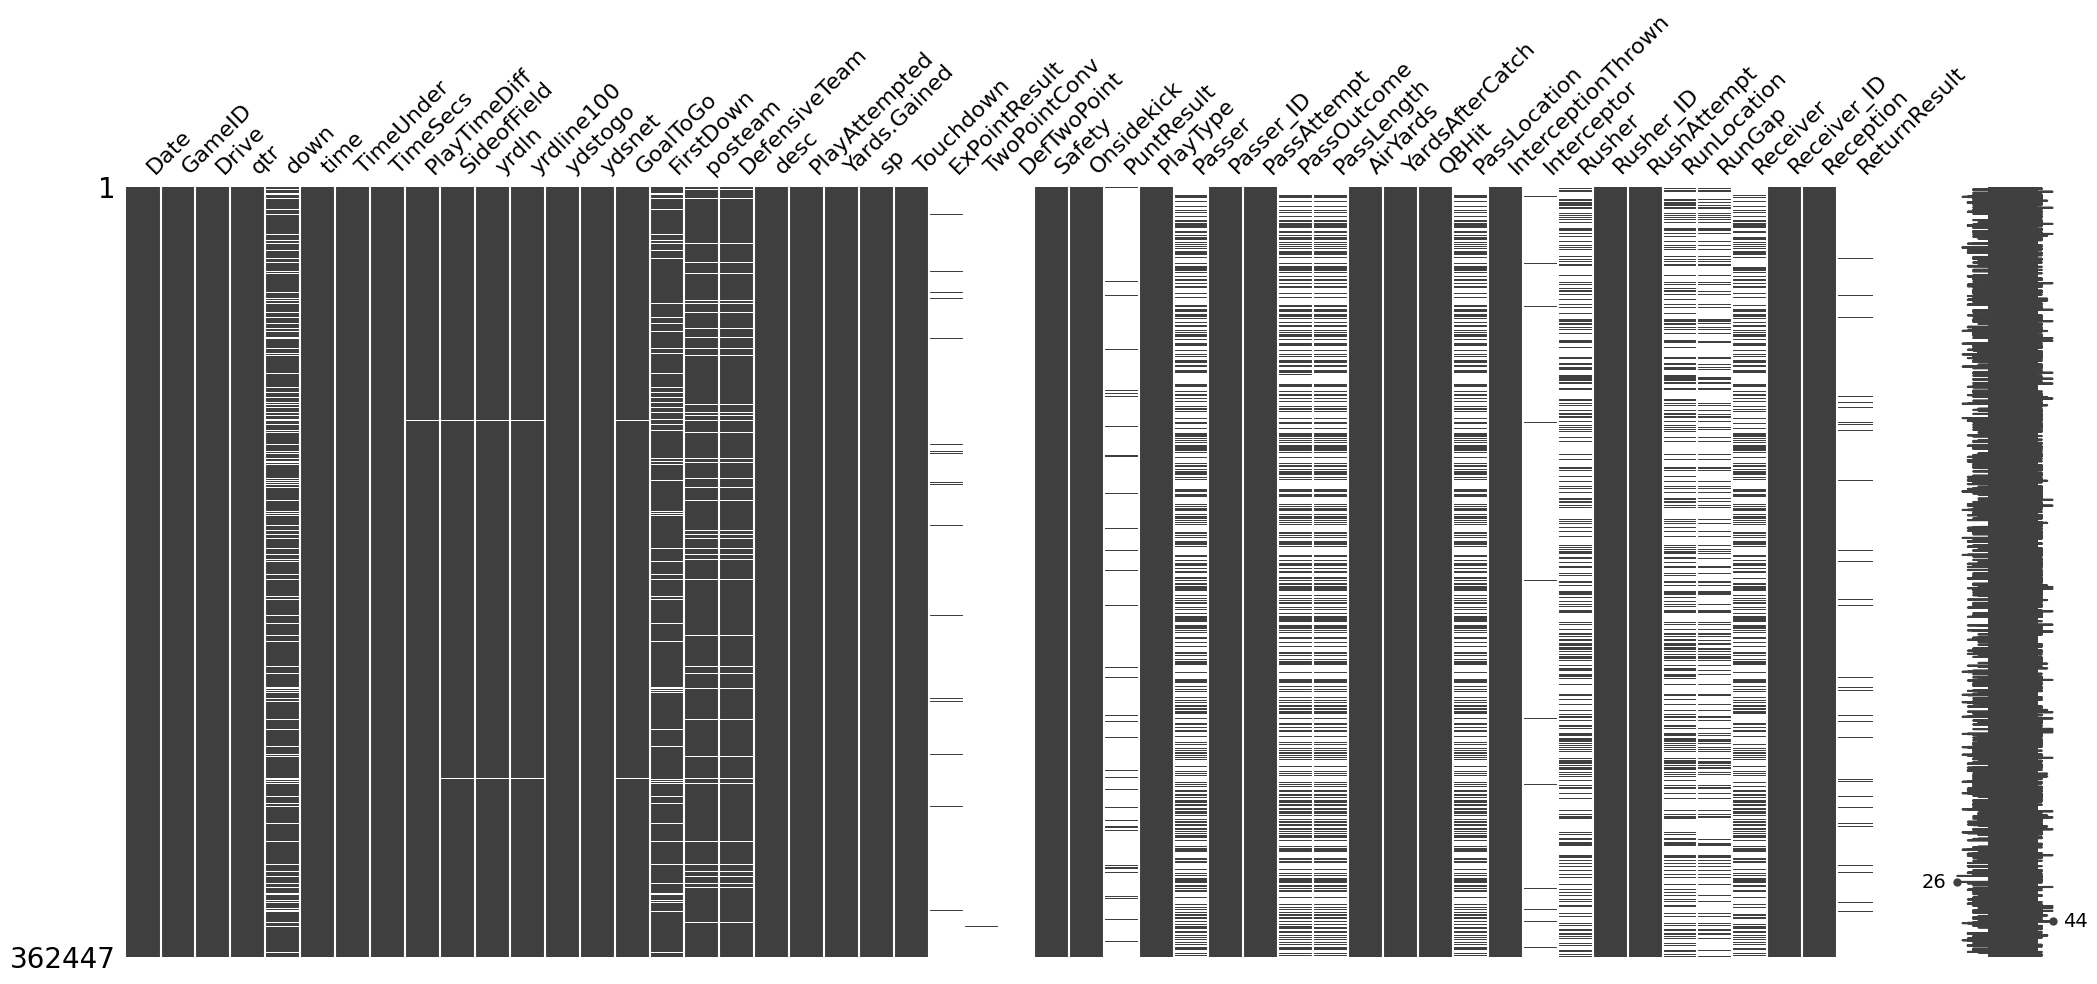

In [5]:
msno.matrix(df1) #Look at here at sparkline, 44 means, a row contains 44 values which is highest among all rows and a row is here which have 26 values which is lowest among all rows.

#sparkline values are changed, because we made matrix for 102 columns and now it's for 50 columns

In [6]:
df2 = df.iloc[:,50:100]
df2

,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,...,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA
0,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,...,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN
1,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,...,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244
2,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,...,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,...,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663
4,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,...,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,...,4.620003,4.620003,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534
362443,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,...,0.068885,NaN,NaN,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,NaN
362444,NaN,NaN,J.Bell,NaN,NaN,NaN,0,NaN,NaN,0,...,-0.692792,NaN,NaN,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,NaN
362445,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,...,0.000000,NaN,NaN,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,NaN


<Axes: >

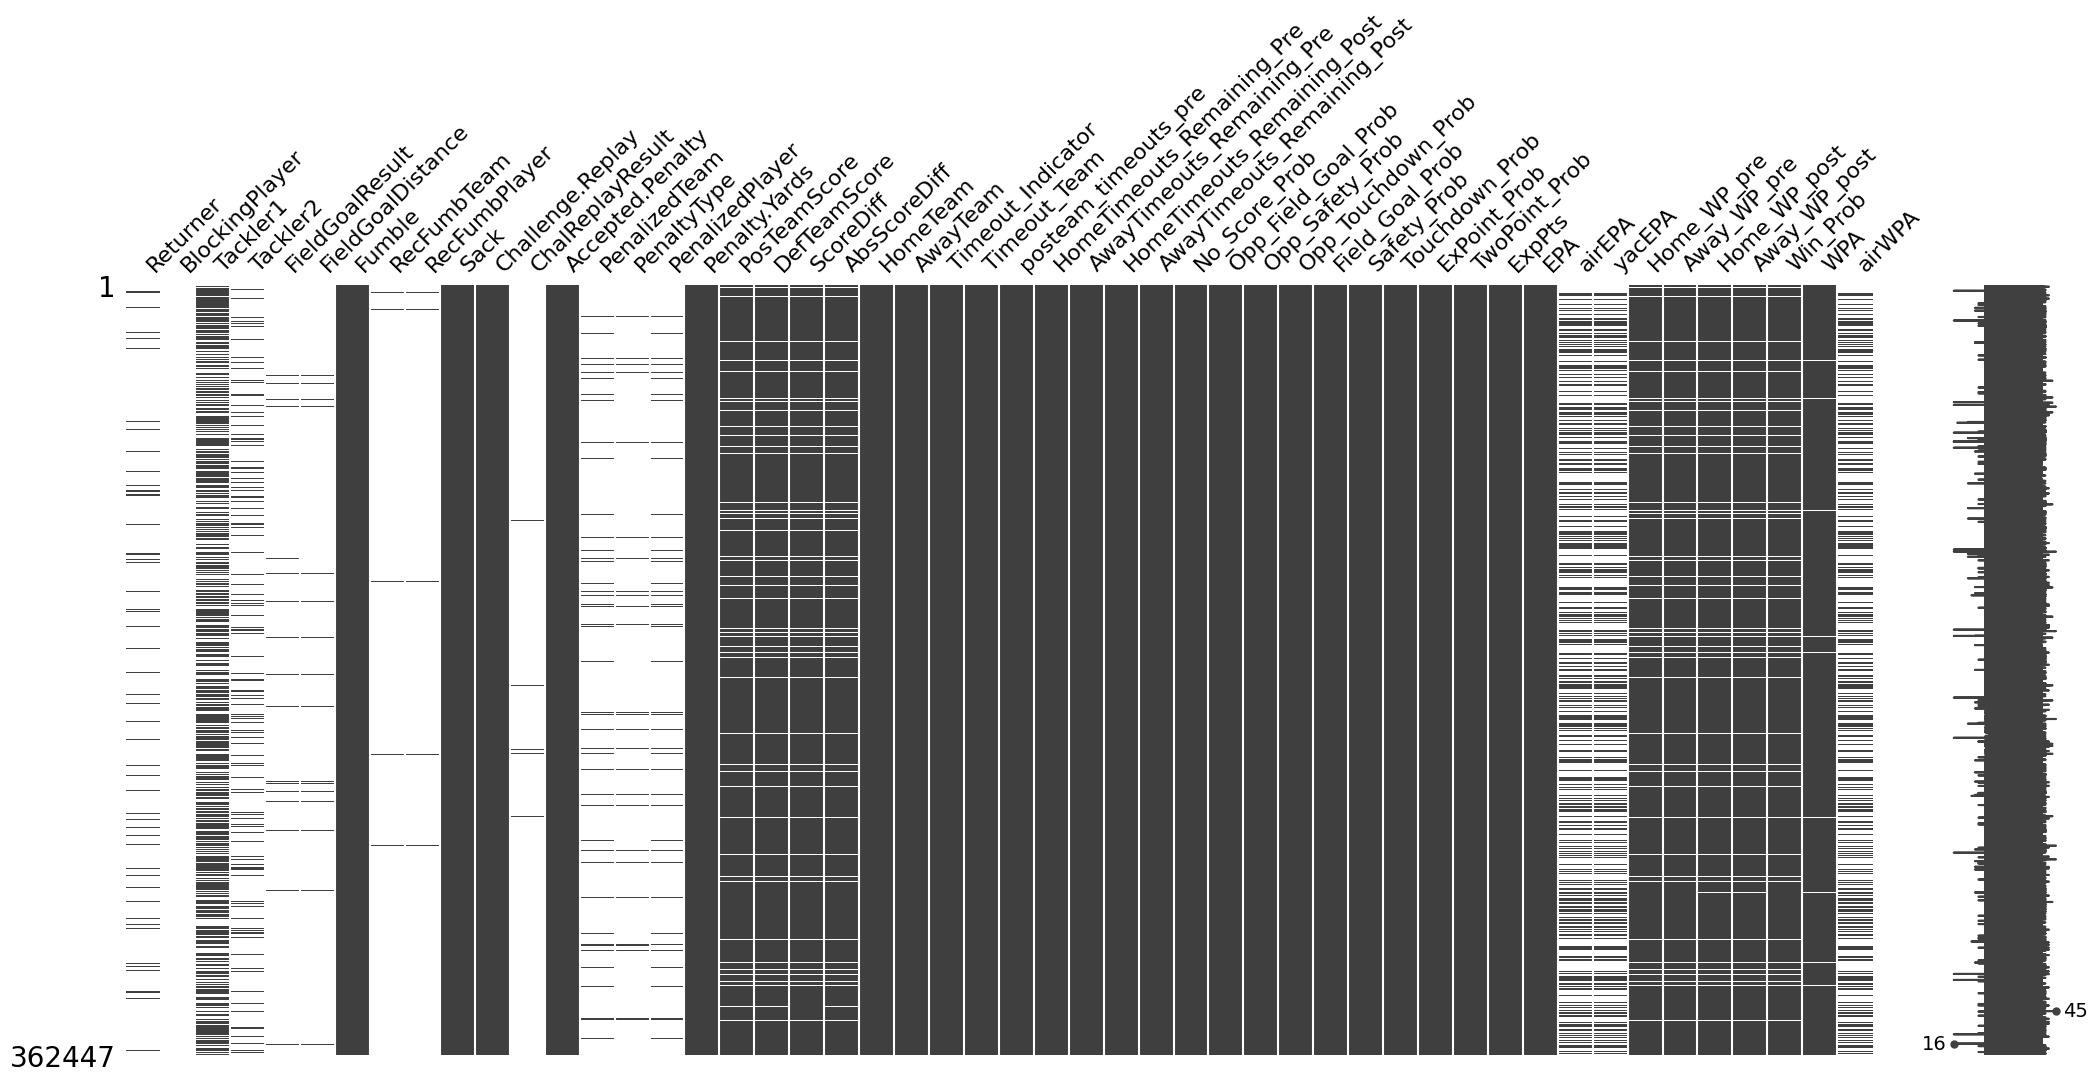

In [7]:
msno.matrix(df2)

In [8]:
df3 = df.iloc[:,100:150] #it will show only 2 columns, Because total 102 columns are there in Dataframe.
df3

,yacWPA,Season
0,NaN,2009
1,0.036899,2009
2,NaN,2009
3,-0.156239,2009
4,NaN,2009
...,...,...
362442,0.000000,2016
362443,NaN,2016
362444,NaN,2016
362445,NaN,2016


<Axes: >

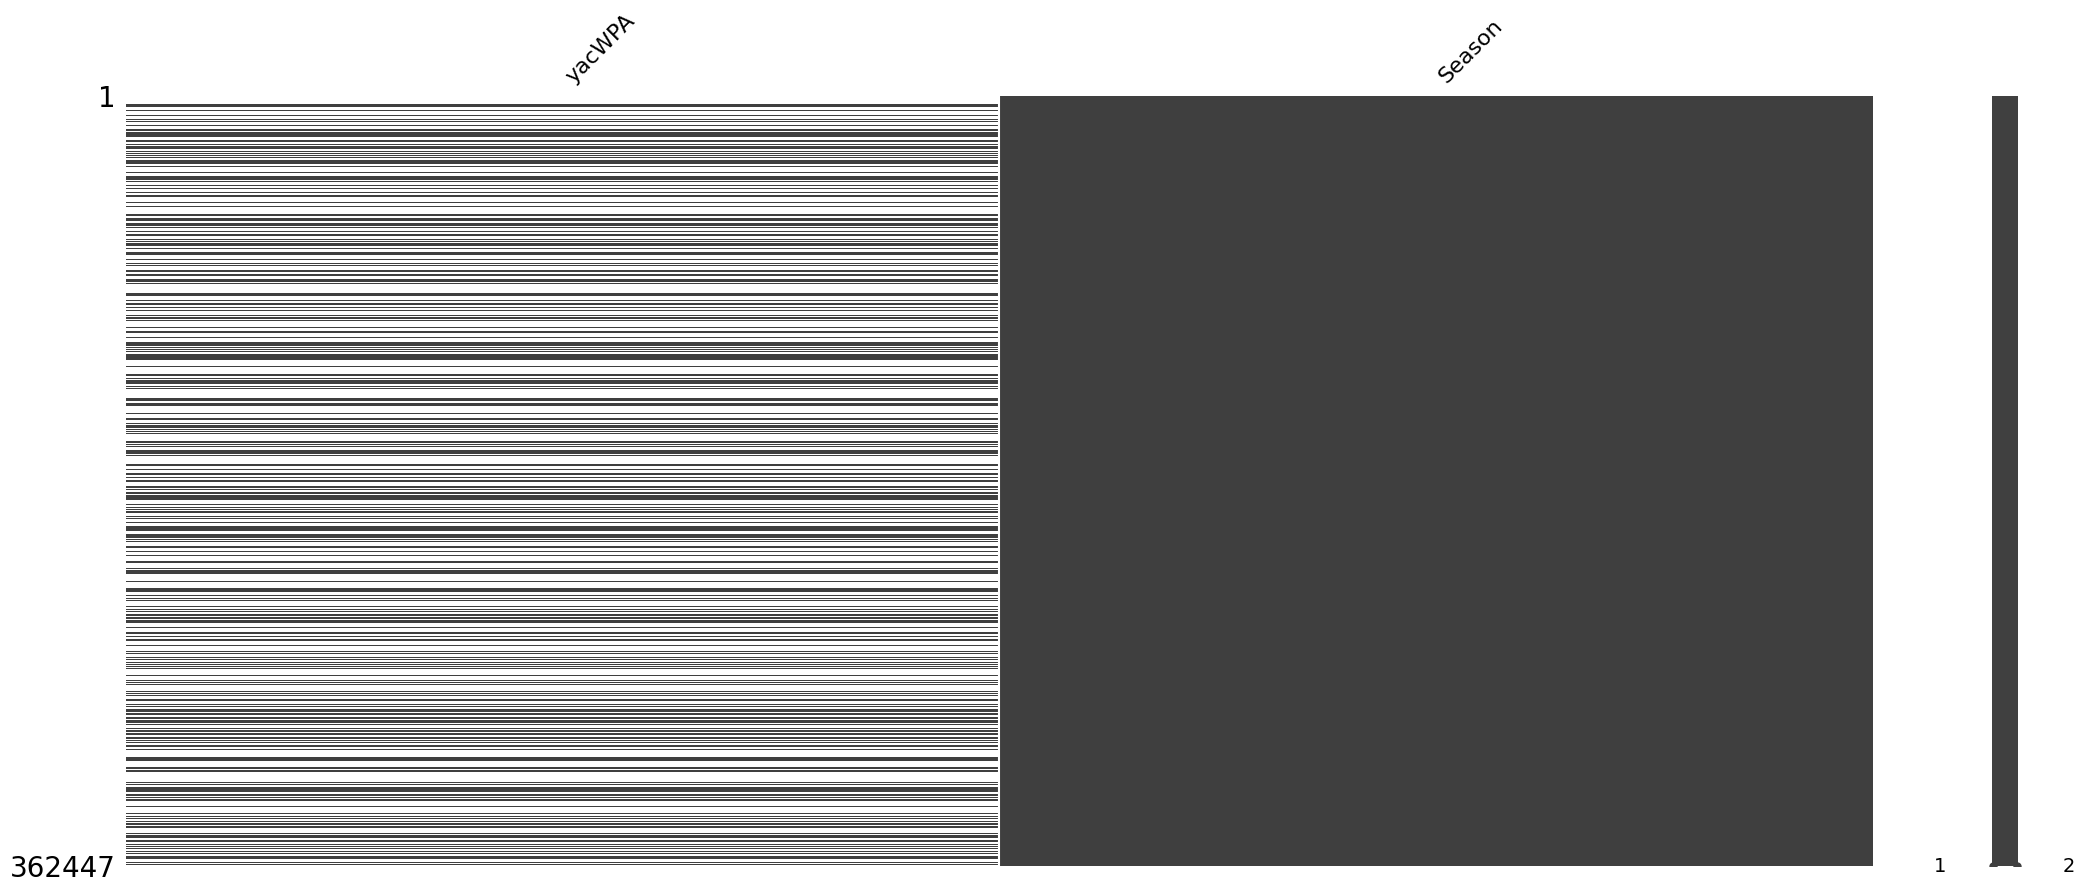

In [9]:
msno.matrix(df3) #And we will remove columns from dataframe 'df' but we keep df1, df2, df3 as it is because they are for just analytic purpose.

# First remove columns which have very less data or nothing in name of data. 😅

In [10]:
print(df.columns.tolist()) #All columns

['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder', 'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown', 'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety', 'Onsidekick', 'PuntResult', 'PlayType', 'Passer', 'Passer_ID', 'PassAttempt', 'PassOutcome', 'PassLength', 'AirYards', 'YardsAfterCatch', 'QBHit', 'PassLocation', 'InterceptionThrown', 'Interceptor', 'Rusher', 'Rusher_ID', 'RushAttempt', 'RunLocation', 'RunGap', 'Receiver', 'Receiver_ID', 'Reception', 'ReturnResult', 'Returner', 'BlockingPlayer', 'Tackler1', 'Tackler2', 'FieldGoalResult', 'FieldGoalDistance', 'Fumble', 'RecFumbTeam', 'RecFumbPlayer', 'Sack', 'Challenge.Replay', 'ChalReplayResult', 'Accepted.Penalty', 'PenalizedTeam', 'PenaltyType', 'PenalizedPlayer', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam', 'T

In [11]:
del df['ExPointResult'] 

In [12]:
del df['TwoPointConv']

In [13]:
del df['DefTwoPoint']

In [14]:
del df['PuntResult']

In [15]:
del df['Interceptor']

In [16]:
del df['RunGap']

In [17]:
del df['ReturnResult']

In [18]:
del df['Returner']

In [19]:
del df['BlockingPlayer']

In [20]:
del df['Tackler2']

In [21]:
del df['FieldGoalResult']

In [22]:
del df['FieldGoalDistance']

In [23]:
del df['RecFumbTeam']

In [24]:
del df['RecFumbPlayer']

In [25]:
del df['ChalReplayResult']

In [26]:
del df['PenalizedTeam']

In [27]:
del df['PenaltyType']

In [28]:
del df['PenalizedPlayer']

In [29]:
del df['airEPA']

In [30]:
del df['yacEPA']

In [31]:
del df['airWPA']

In [32]:
del df['RunLocation'] 

In [33]:
del df['Passer'] 

In [34]:
del df['PassOutcome'] 

In [35]:
del df['PassLength'] 

In [36]:
del df['PassLocation'] 

In [37]:
del df['Rusher'] 

In [38]:
del df['Receiver'] 

In [39]:
del df['Tackler1'] 

In [40]:
del df['yacWPA'] 

In [41]:
print(df.columns.tolist())

['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder', 'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'Passer_ID', 'PassAttempt', 'AirYards', 'YardsAfterCatch', 'QBHit', 'InterceptionThrown', 'Rusher_ID', 'RushAttempt', 'Receiver_ID', 'Reception', 'Fumble', 'Sack', 'Challenge.Replay', 'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam', 'Timeout_Indicator', 'Timeout_Team', 'posteam_timeouts_pre', 'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre', 'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post', 'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExPoint_Prob', 'TwoPoint_Prob', 'ExpPts', 'EPA', 'Home_WP_pre', 'Away_WP_pre'

<Axes: >

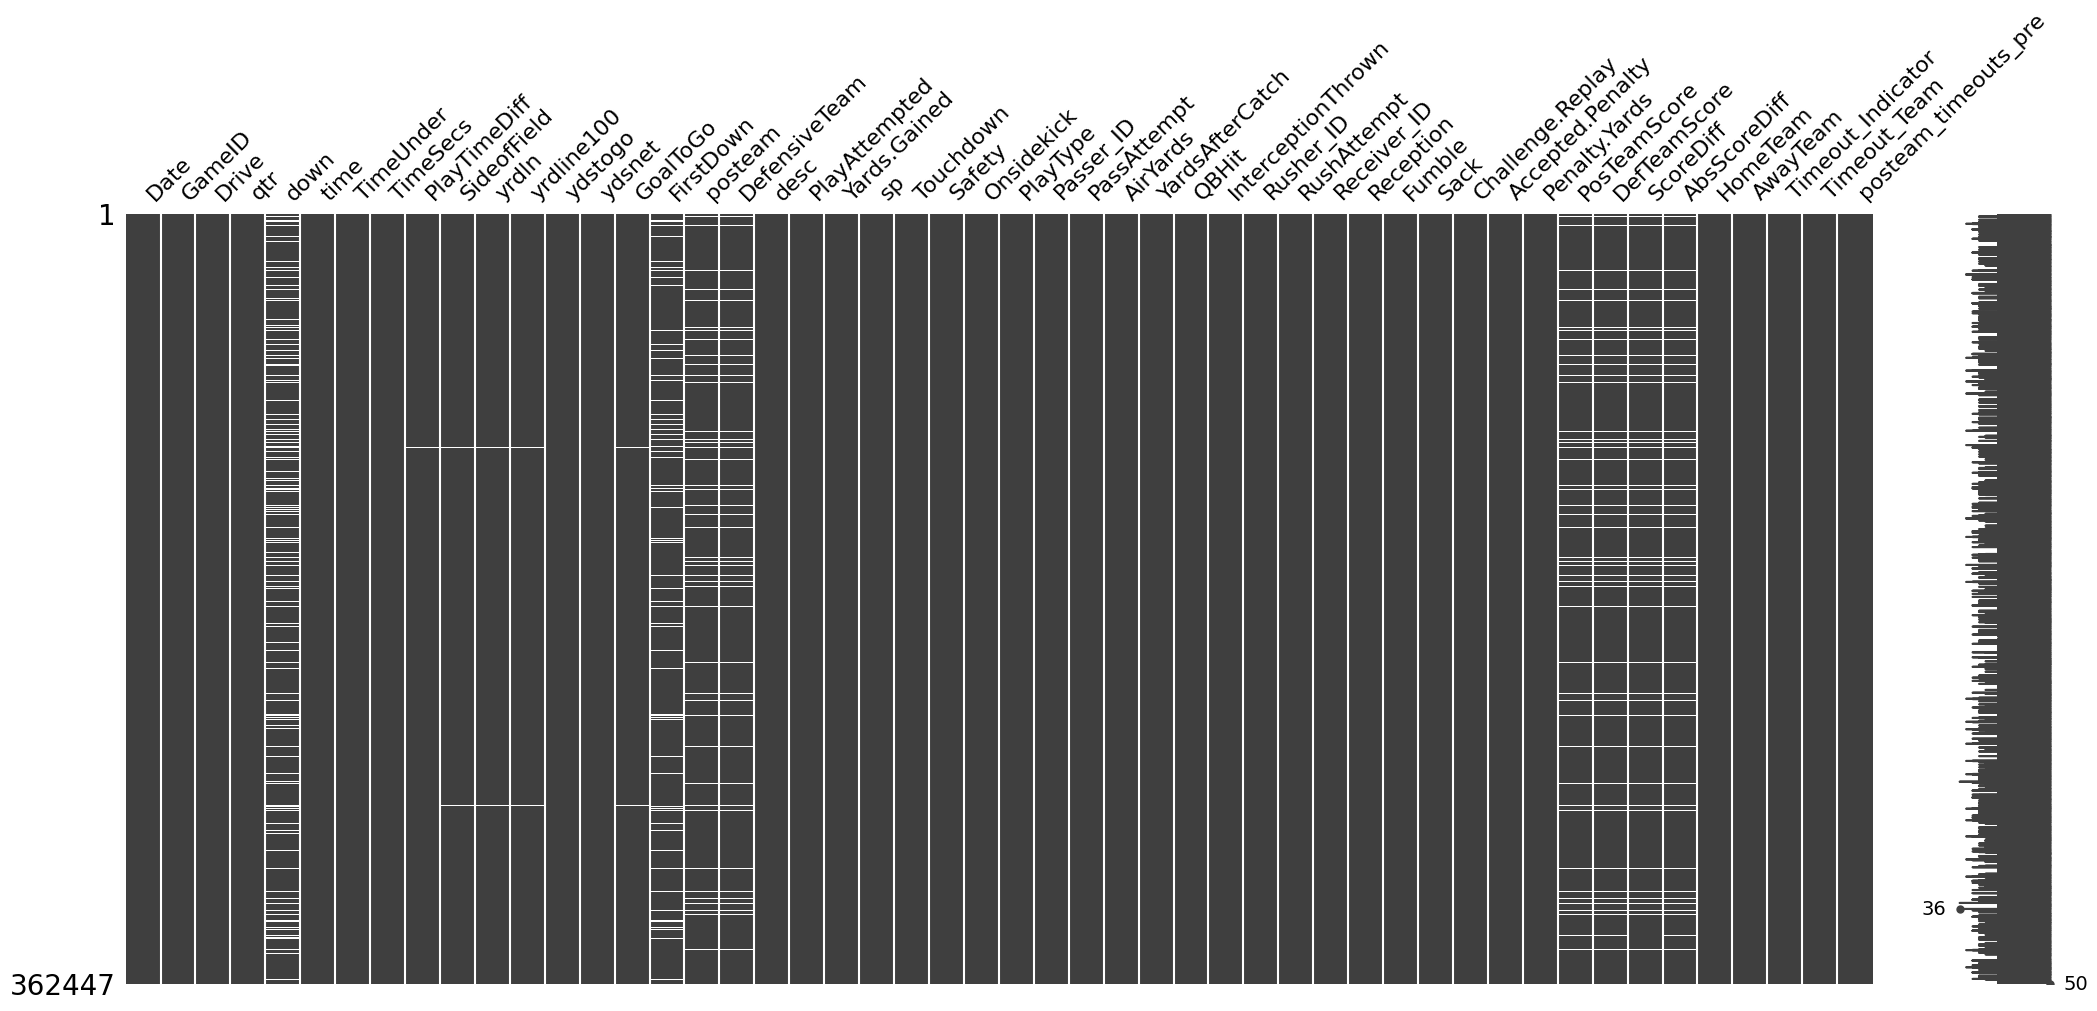

In [42]:
df1_new = df.iloc[:,:50]
msno.matrix(df1_new)

<Axes: >

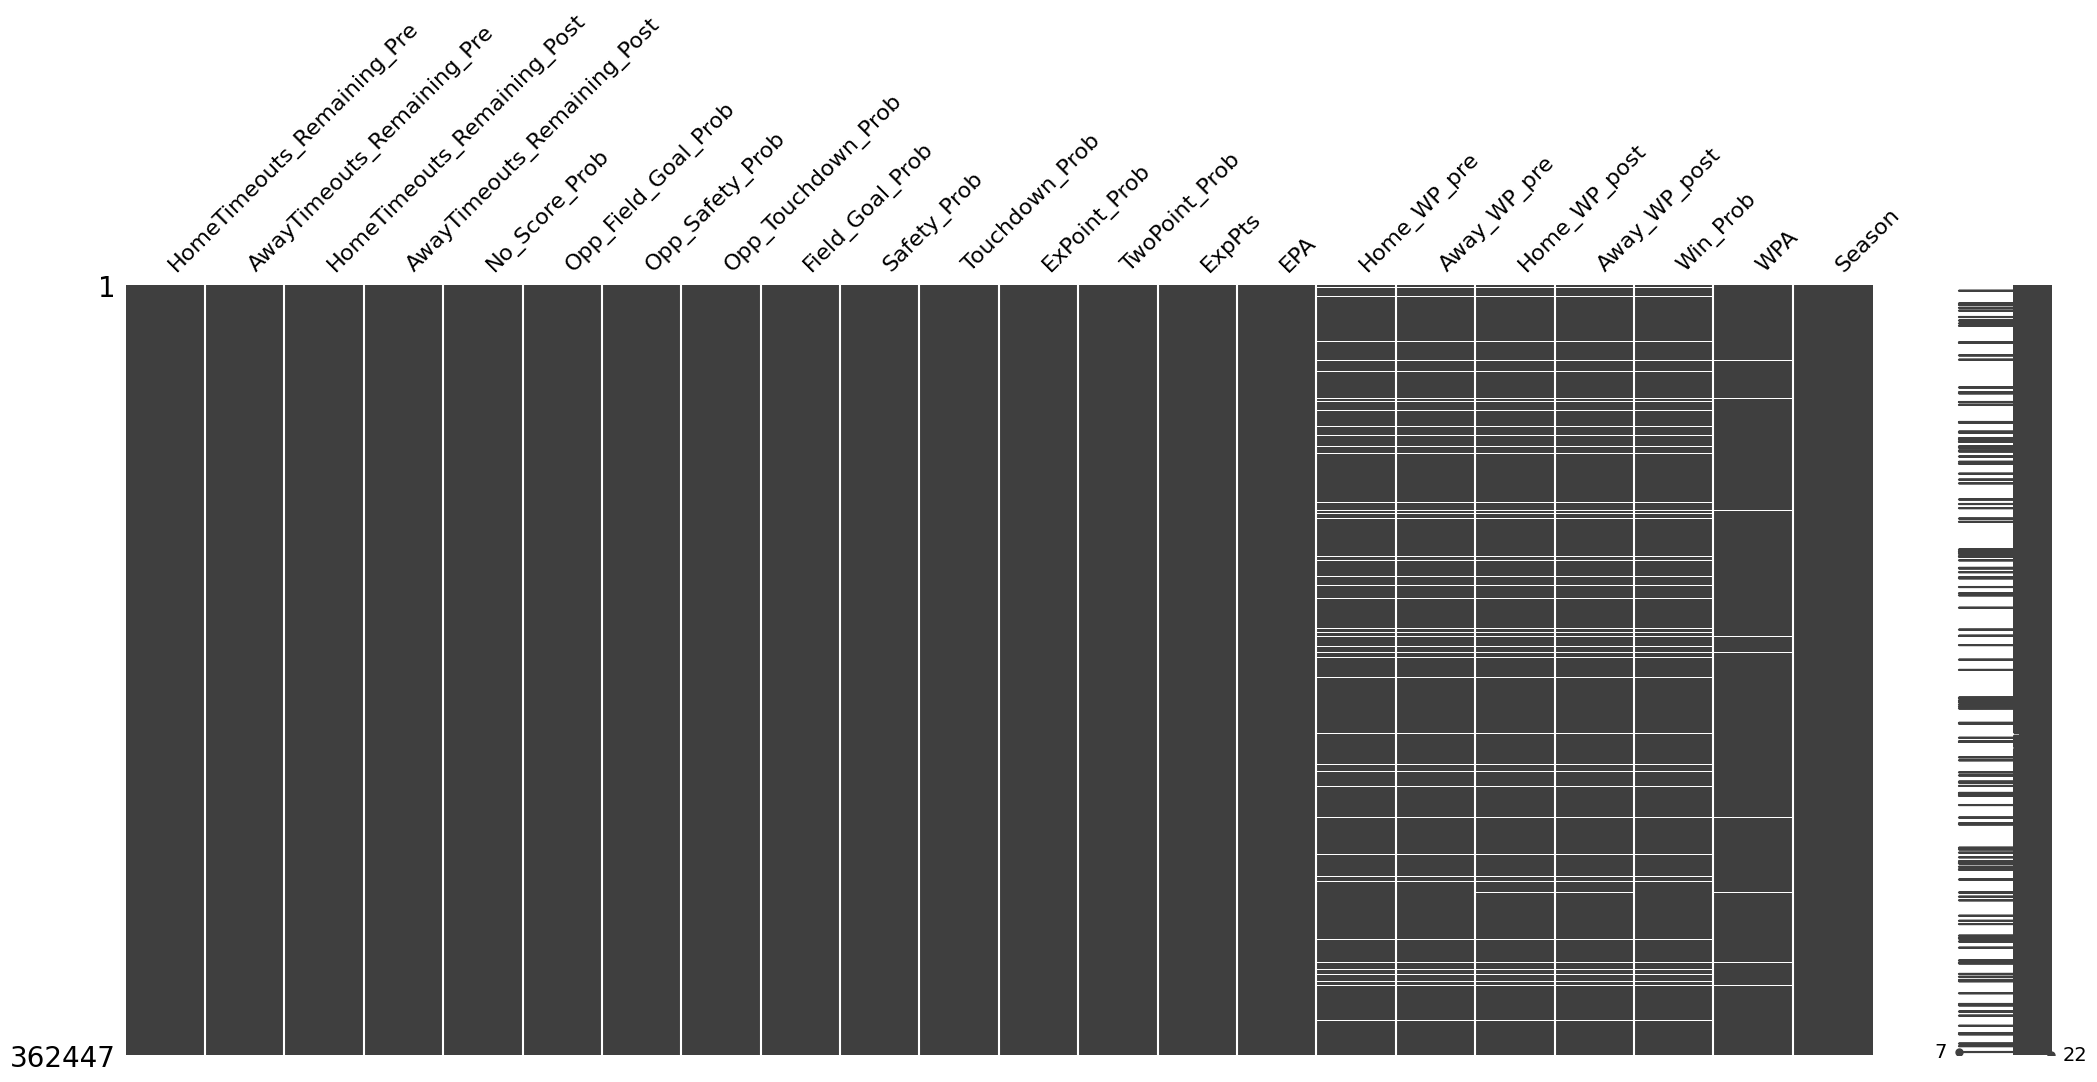

In [43]:
df2_new = df.iloc[:,50:100]
msno.matrix(df2_new)

We removed columns which have very few data (or nothing in name of data 😅), But still here some columns are preset which have missing values but not that much, so we have to contact our client to ask about that column for precise prediction. (If they want to keep that columns in the prediction model, keep them or remove them.)

In [44]:
print(df.isnull().sum())
print(df.shape)

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
                ...  
Home_WP_post    23360
Away_WP_post    23360
Win_Prob        21993
WPA              4817
Season              0
Length: 72, dtype: int64
(362447, 72)


In [45]:
df.dropna(inplace=True) #will delete any row with missing value because, there are some rows available that have too many missing values
print(df.isnull().sum())
print(df.shape)

Date            0
GameID          0
Drive           0
qtr             0
down            0
               ..
Home_WP_post    0
Away_WP_post    0
Win_Prob        0
WPA             0
Season          0
Length: 72, dtype: int64
(306907, 72)


<Axes: >

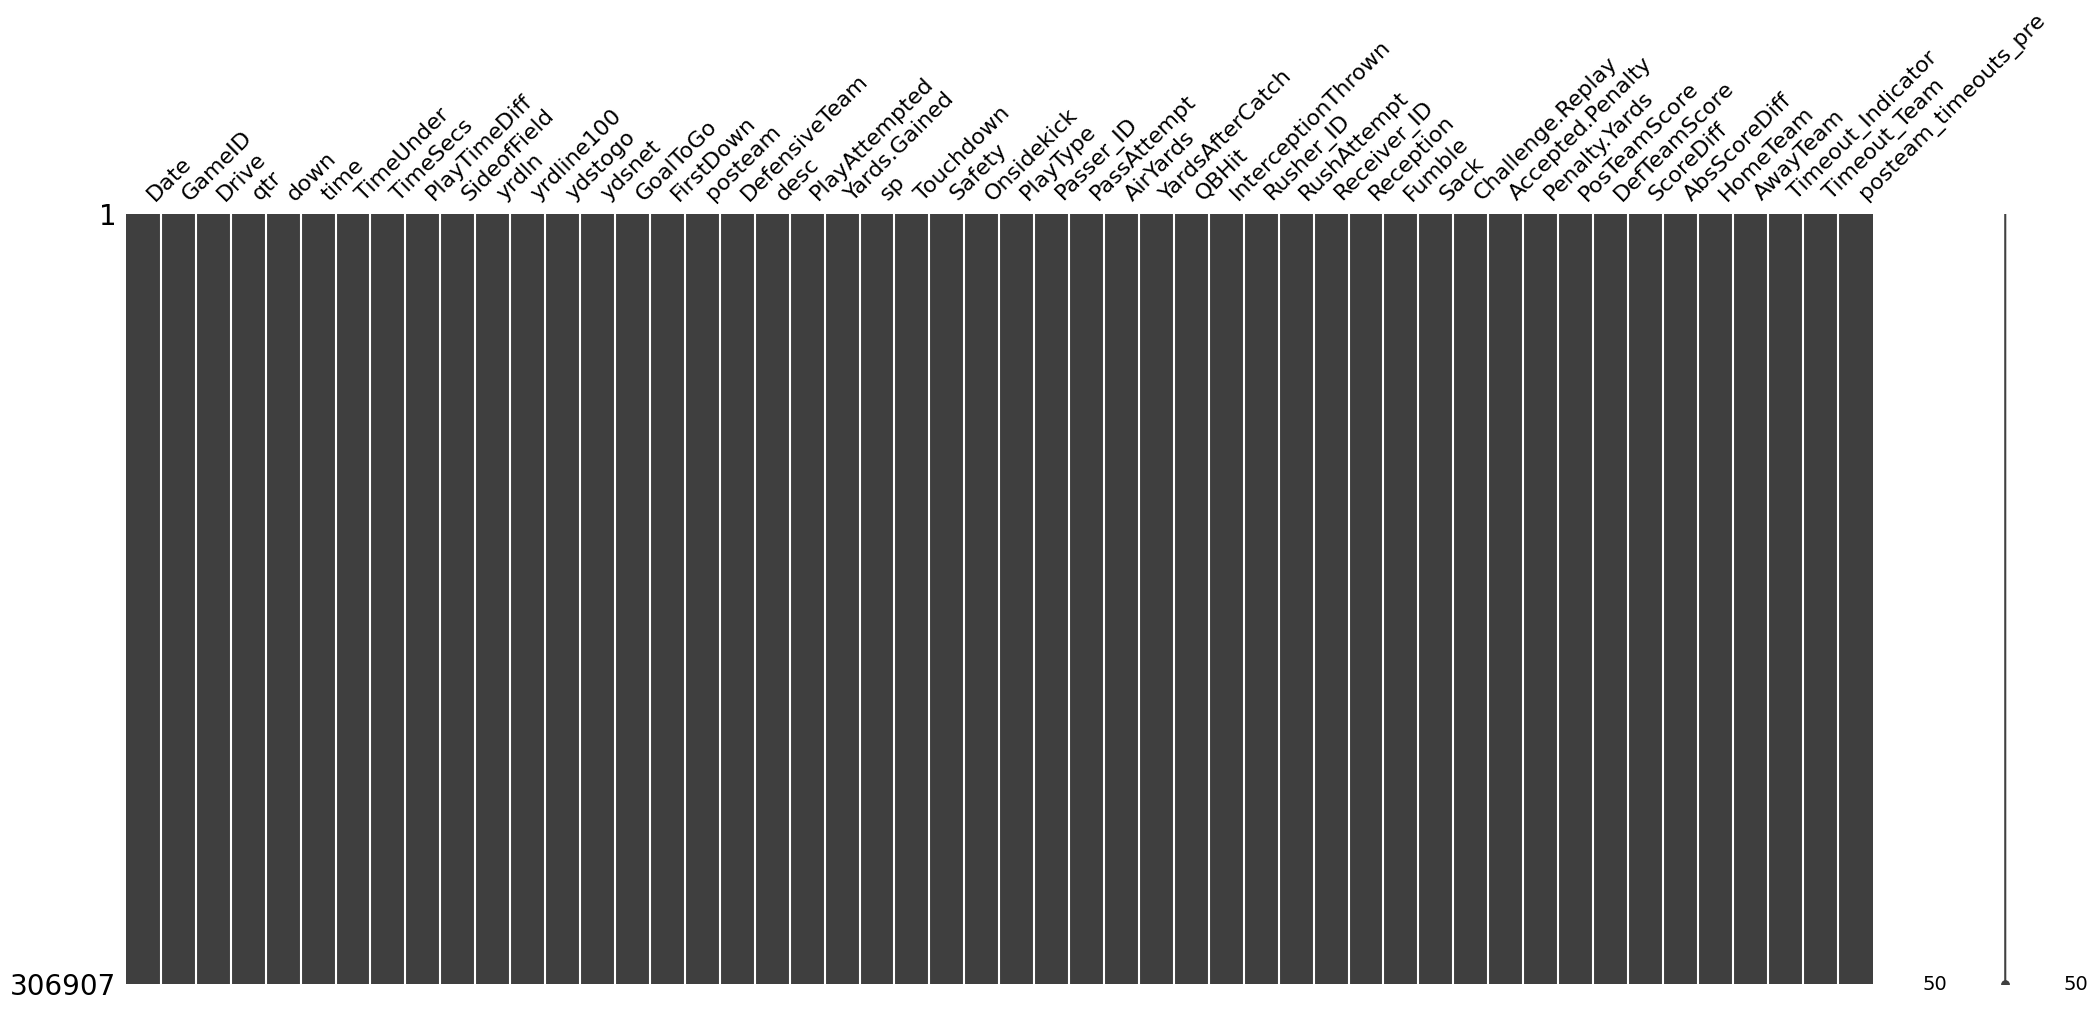

In [48]:
df1_new = df.iloc[:,:50]
msno.matrix(df1_new)

<Axes: >

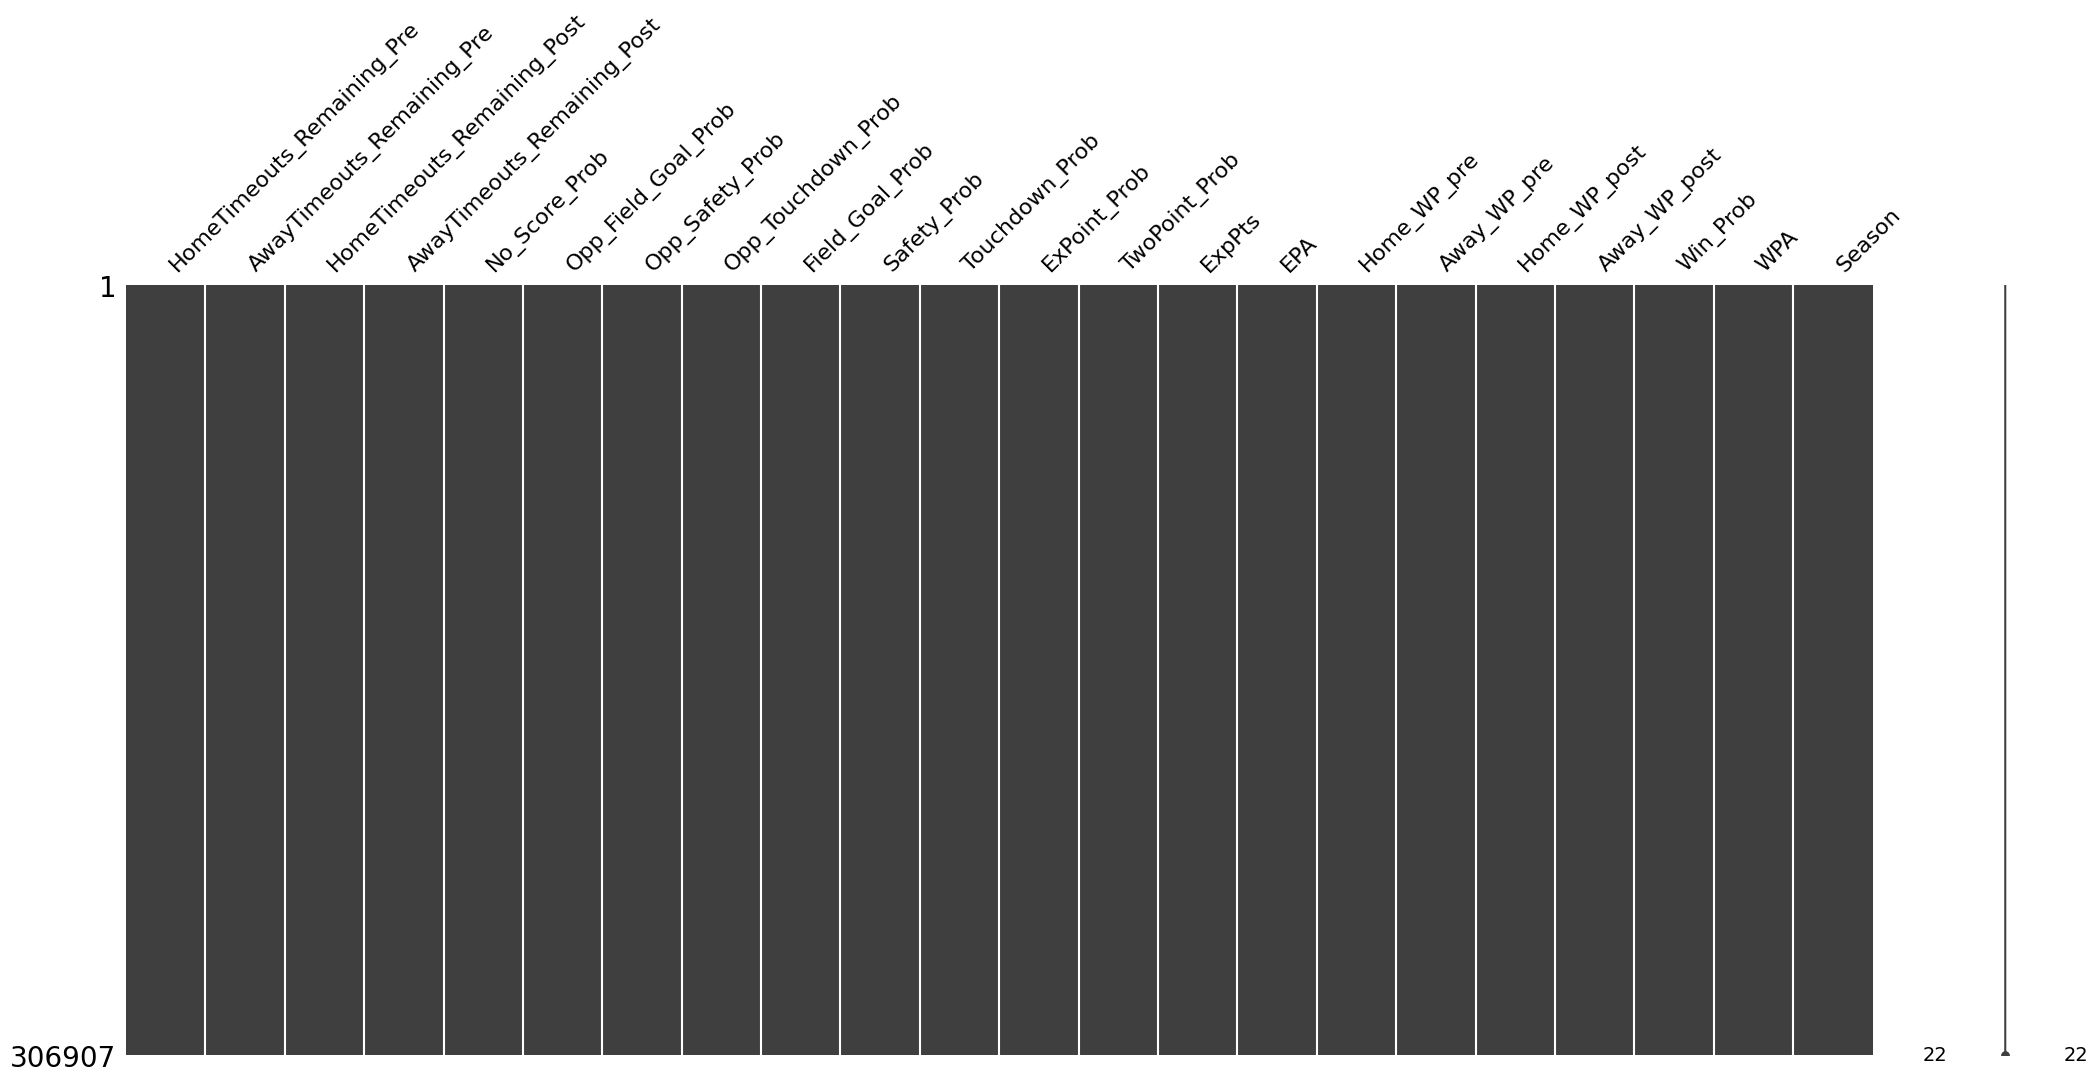

In [49]:
df2_new = df.iloc[:,50:100]
msno.matrix(df2_new)

## Now, go to the our first matrix of this file and see the difference between that and our last 2 matrices.

Benefits of this method:  
A robust model is one that has been trained with all missing values eliminated with this model.

Drawbacks of this Method:  
    significant information loss.  
    fails miserably if the proportion of missing values is too high when compared to the entire dataset.

# Done, Thanks to visit, 
# Wish you luck in this field ✨